In [230]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import cartopy.crs as ccrs
import numpy as np

In [2]:
nem_files = np.sort(glob.glob("/g/data/ng72/ab4502/capacity_factor/hourly_wind_ts_barra_c_????????_????????.csv"))

In [4]:
nem = pd.concat([pd.read_csv(f,index_col=0,parse_dates=True) for f in nem_files])

(0.0, 1.0)

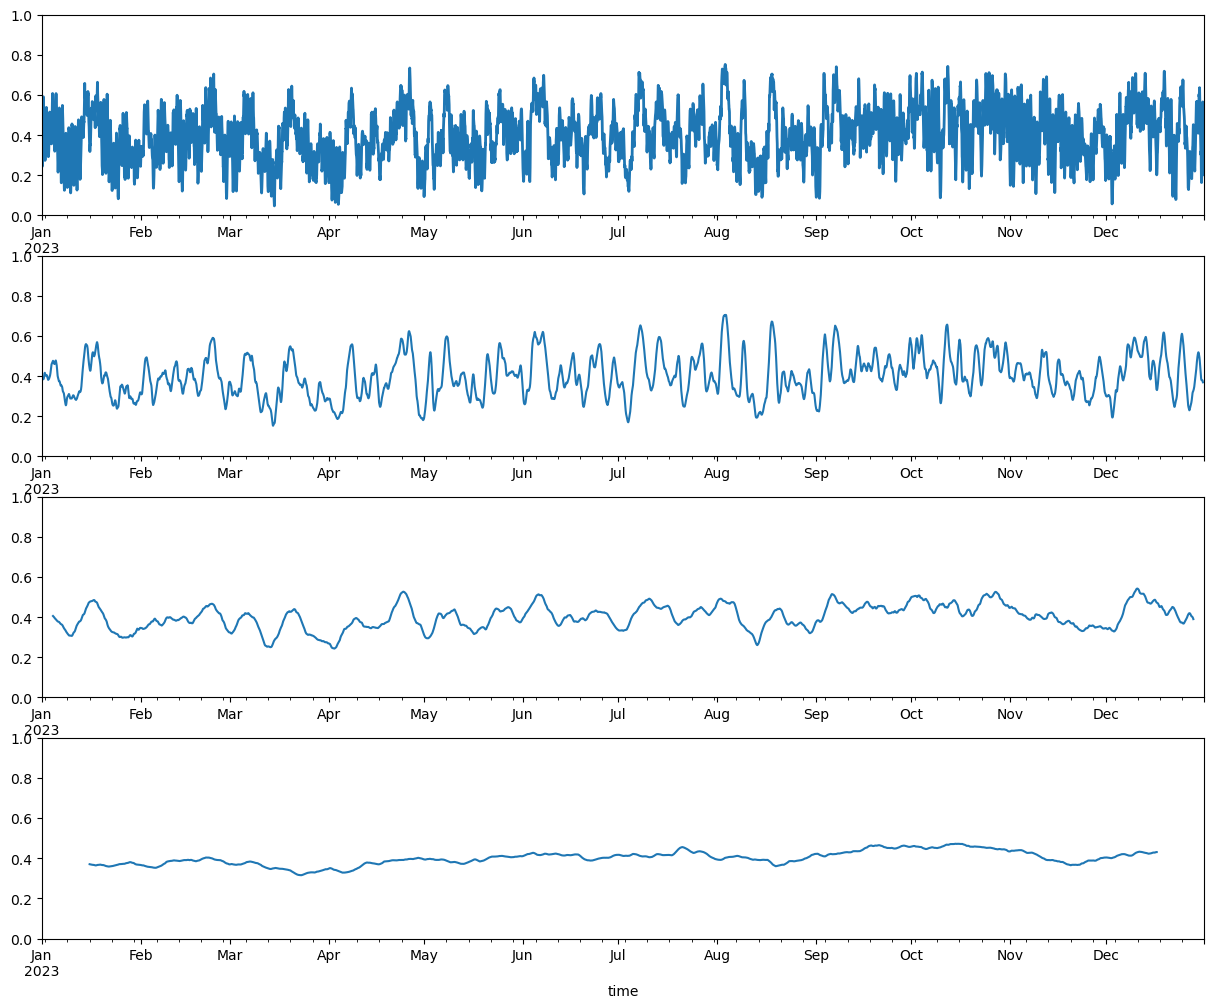

In [14]:
plt.figure(figsize=[15,12])
ax=plt.subplot(4,1,1)
nem["NEM"].loc[slice("2023-01-01","2023-12-31 23:00")].plot(ax=ax,lw=2)
ax.set_ylim([0,1])

ax=plt.subplot(4,1,2)
nem["NEM"].loc[slice("2023-01-01","2023-12-31 23:00")].rolling(24,center=True).mean().plot(ax=ax)
ax.set_ylim([0,1])

ax=plt.subplot(4,1,3)
nem["NEM"].loc[slice("2023-01-01","2023-12-31 23:00")].rolling(24*7,center=True).mean().plot(ax=ax)
ax.set_ylim([0,1])

ax=plt.subplot(4,1,4)
nem["NEM"].loc[slice("2023-01-01","2023-12-31 23:00")].rolling(24*30,center=True).mean().plot(ax=ax)
ax.set_ylim([0,1])

(0.0, 1.0)

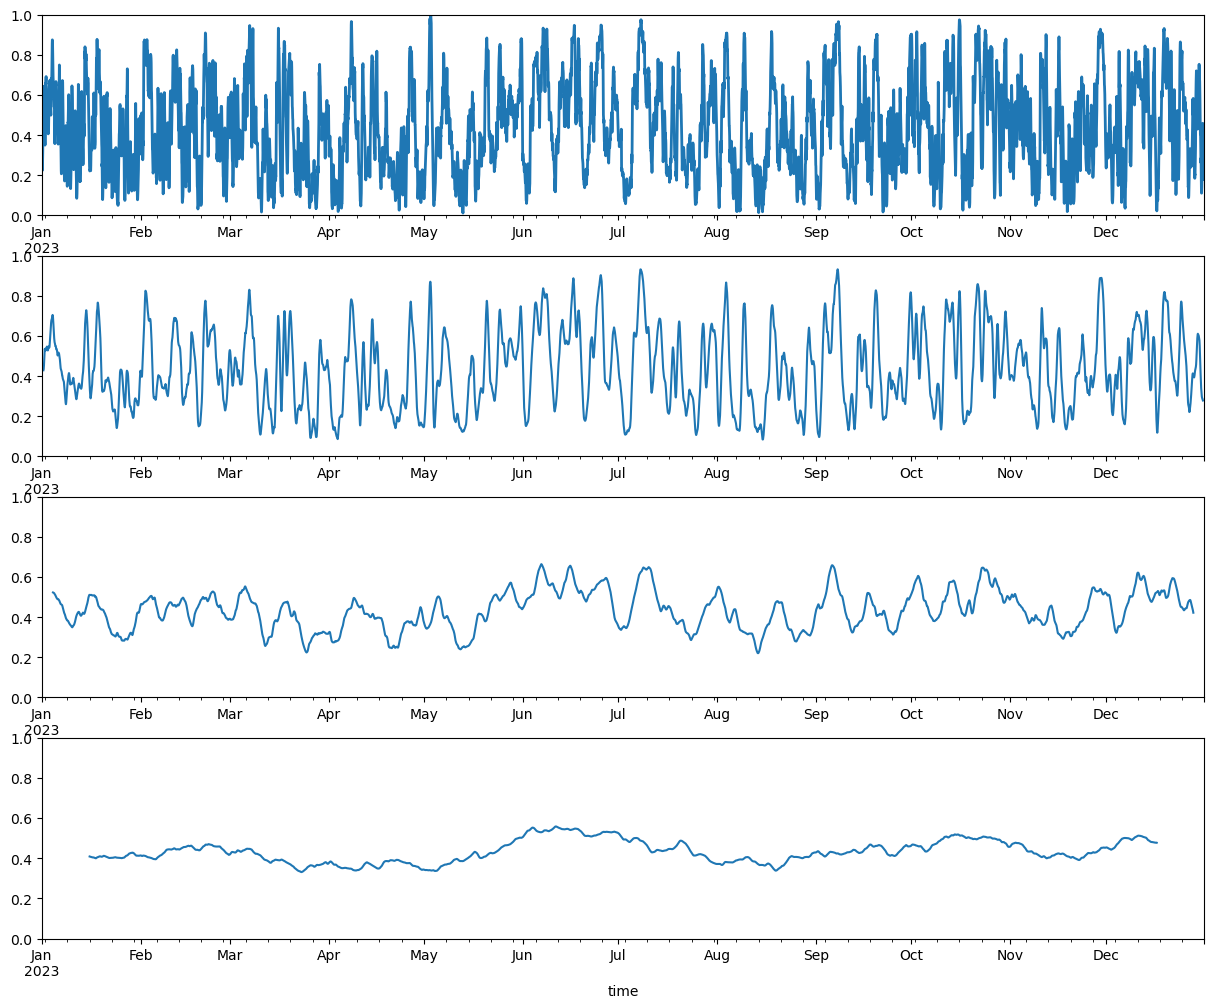

In [15]:
plt.figure(figsize=[15,12])
ax=plt.subplot(4,1,1)
nem["V"].loc[slice("2023-01-01","2023-12-31 23:00")].plot(ax=ax,lw=2)
ax.set_ylim([0,1])

ax=plt.subplot(4,1,2)
nem["V"].loc[slice("2023-01-01","2023-12-31 23:00")].rolling(24,center=True).mean().plot(ax=ax)
ax.set_ylim([0,1])

ax=plt.subplot(4,1,3)
nem["V"].loc[slice("2023-01-01","2023-12-31 23:00")].rolling(24*7,center=True).mean().plot(ax=ax)
ax.set_ylim([0,1])

ax=plt.subplot(4,1,4)
nem["V"].loc[slice("2023-01-01","2023-12-31 23:00")].rolling(24*30,center=True).mean().plot(ax=ax)
ax.set_ylim([0,1])

array([[<Axes: title={'center': 'NEM'}>, <Axes: title={'center': 'Q'}>],
       [<Axes: title={'center': 'N'}>, <Axes: title={'center': 'V'}>],
       [<Axes: title={'center': 'S'}>, <Axes: title={'center': 'T'}>]],
      dtype=object)

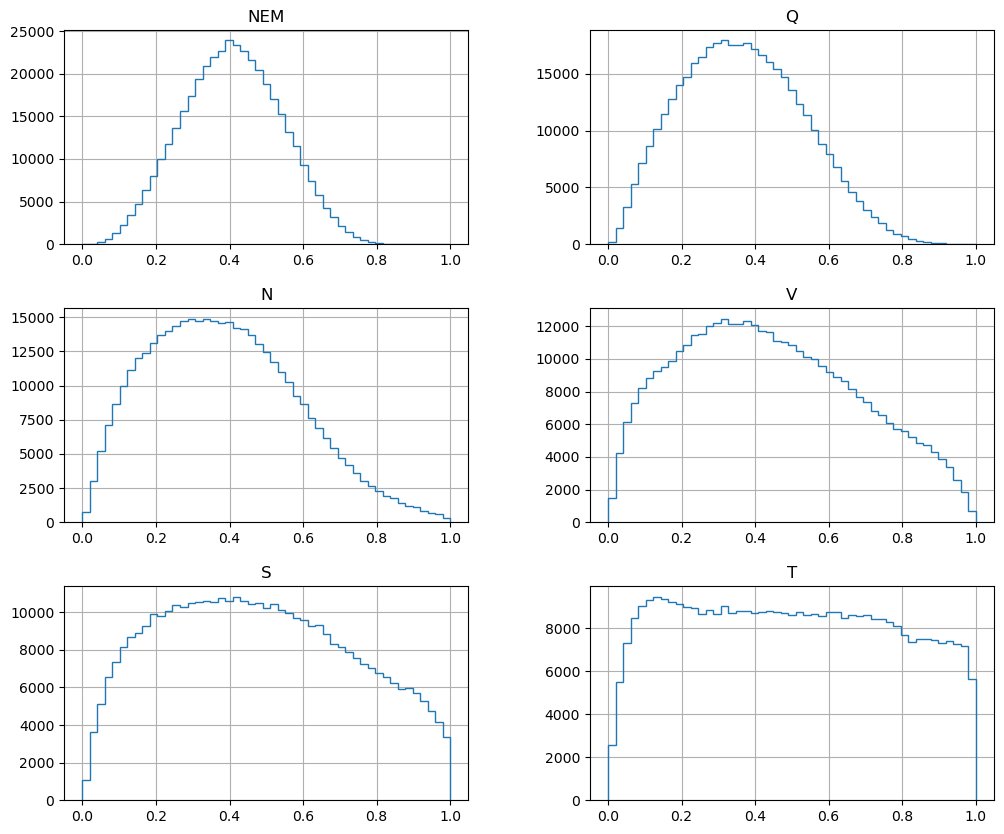

In [23]:
nem.hist(bins=np.linspace(0,1,50),histtype="step",figsize=[12,10])


array([[<Axes: title={'center': 'NEM'}>, <Axes: title={'center': 'Q'}>],
       [<Axes: title={'center': 'N'}>, <Axes: title={'center': 'V'}>],
       [<Axes: title={'center': 'S'}>, <Axes: title={'center': 'T'}>]],
      dtype=object)

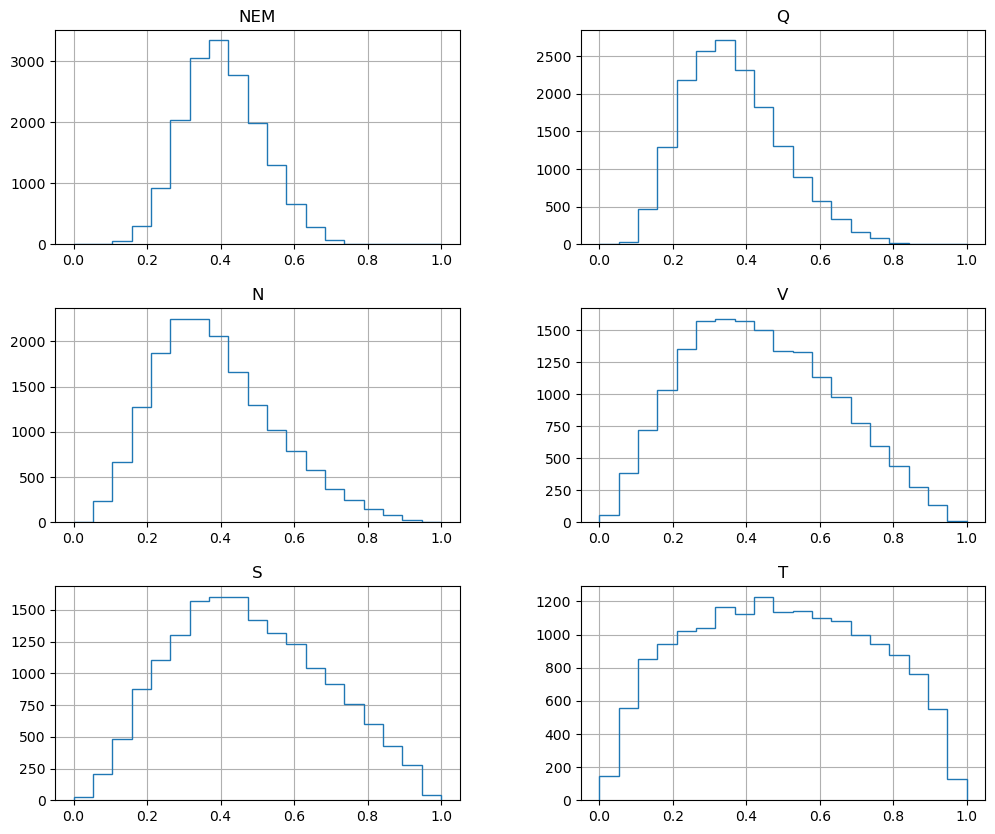

In [28]:
nem.resample("1D").mean().hist(bins=np.linspace(0,1,20),histtype="step",figsize=[12,10])

In [178]:
#low_wind_days = v.resample("1D").mean().sort_values(by="cf")[0:200]
#high_wind_days = v.resample("1D").mean().sort_values(by="cf")[-200:]


nem_daily = nem.resample("1D").mean()
nem_daily = nem_daily.loc[(nem_daily.index.month==12) | (nem_daily.index.month==1) | (nem_daily.index.month==2)]

high_wind = nem_daily[nem_daily > nem_daily.quantile(0.8)]
high_wind_days = dict(zip(nem_daily.columns,[pd.to_datetime(high_wind[r].dropna().index) for r in nem_daily.columns]))

low_wind = nem_daily[nem_daily < nem_daily.quantile(0.2)]
low_wind_days = dict(zip(nem_daily.columns,[pd.to_datetime(low_wind[r].dropna().index) for r in nem_daily.columns]))

In [179]:
nem_temp = nem.reset_index()
nem_temp = nem_temp.loc[(nem_temp.time.dt.month==12) | (nem_temp.time.dt.month==1) | (nem_temp.time.dt.month==2)]
nem_temp["date"] = pd.to_datetime(nem_temp["time"]).dt.date

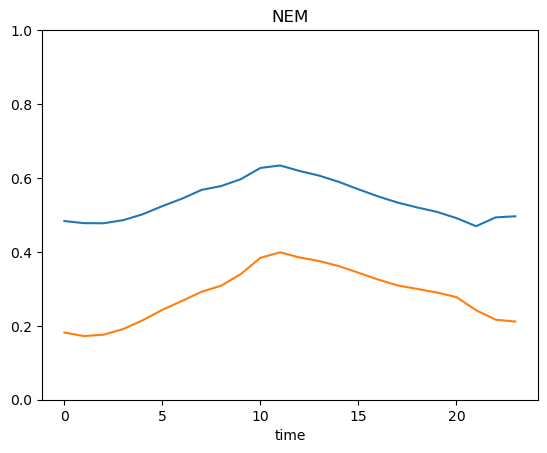

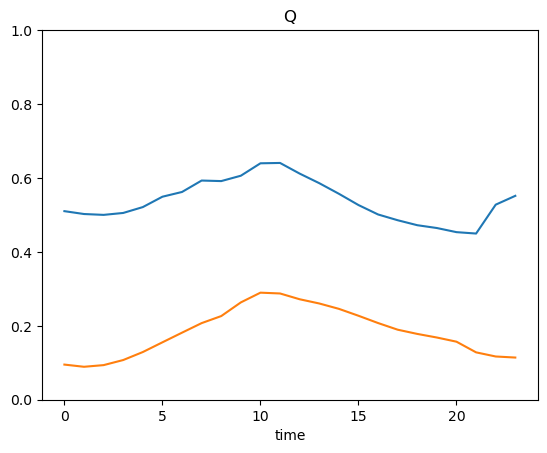

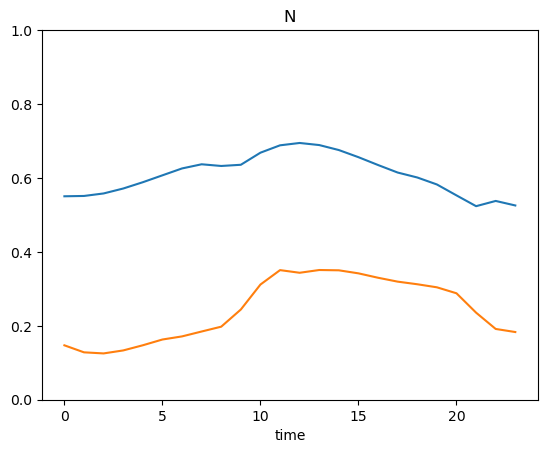

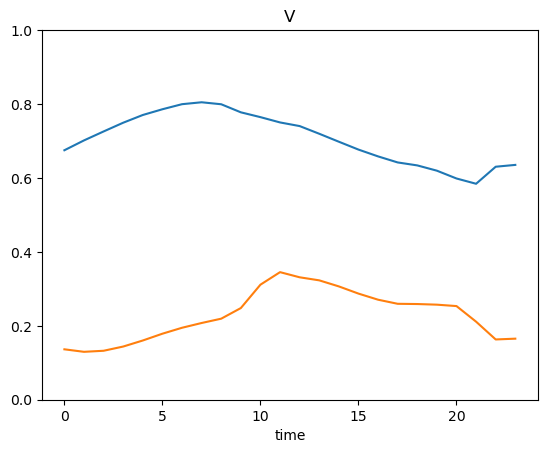

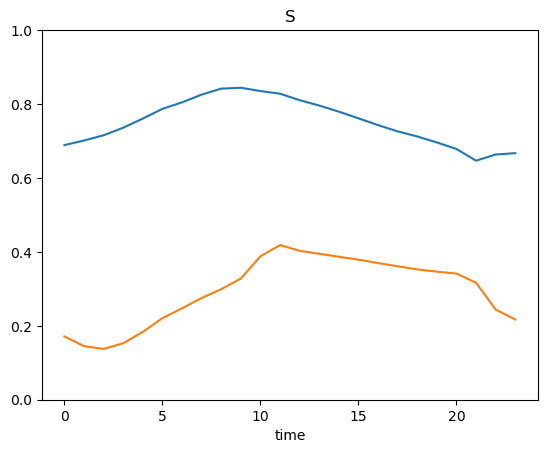

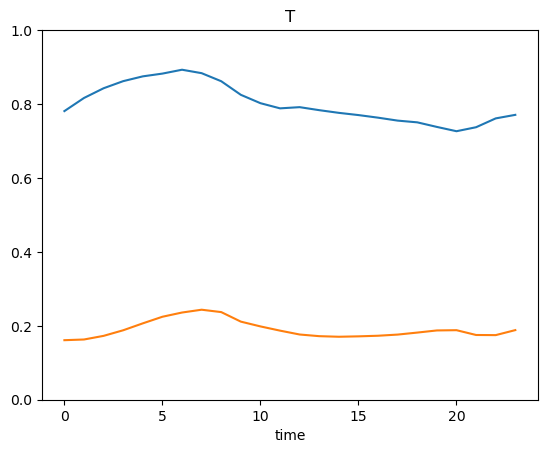

In [197]:
for state in nem.columns:

    plt.figure()
    high_wind_ts_v = nem_temp.set_index("date").loc[high_wind_days[state].date].set_index("time")[state]
    low_wind_ts_v = nem_temp.set_index("date").loc[low_wind_days[state].date].set_index("time")[state]
    
    high_wind_ts_v.groupby(high_wind_ts_v.index.hour).mean().plot()
    low_wind_ts_v.groupby(low_wind_ts_v.index.hour).mean().plot()

    plt.title(state)

    plt.ylim([0,1])

In [8]:
# plt.figure()
# ax=plt.axes()
# for n in range(len(v_daily_drought_days)):
#     ax.plot(v[np.in1d(v.index.date, v_daily_drought_days[n].date())].values)
# plt.ylim([0,1])
# plt.gca().axhline(0.2)

In [9]:
# plt.figure()
# ax=plt.axes()
# for n in range(len(v_daily_drought_days)):
#     v[np.in1d(v.index.date, v_daily_drought_days[n].date())].plot(ax=ax,legend=False)
# plt.ylim([0,1])
# plt.gca().axhline(0.2)

NEM (3,)
VIC (36,)
NSW (29,)
QLD (15,)
SA (20,)


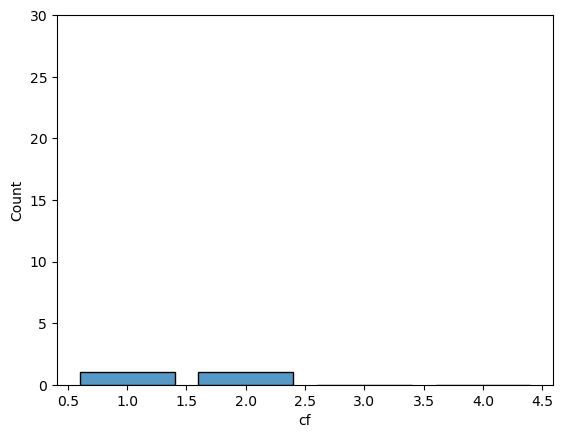

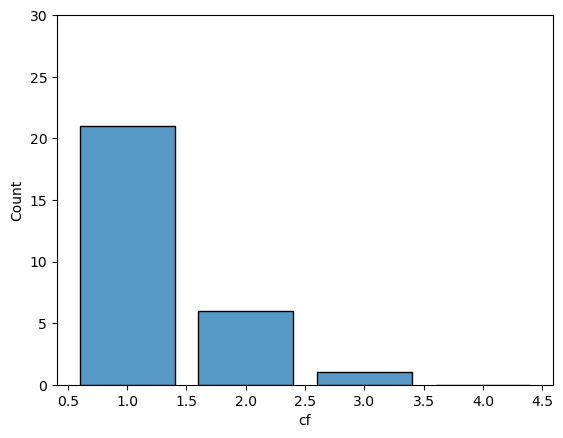

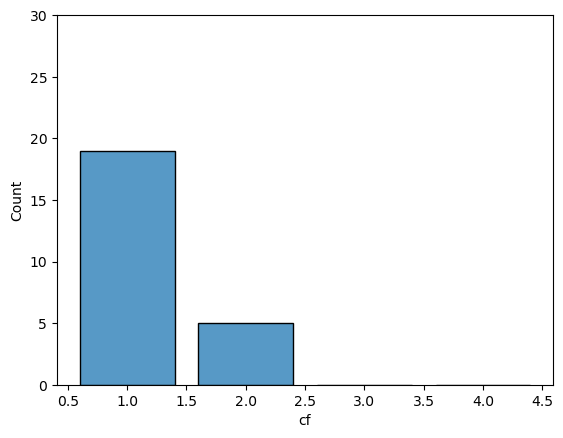

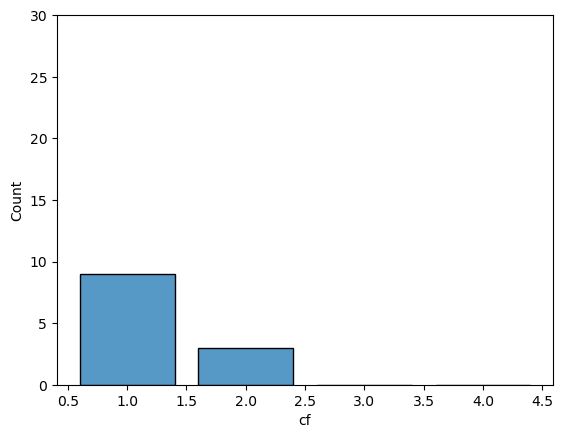

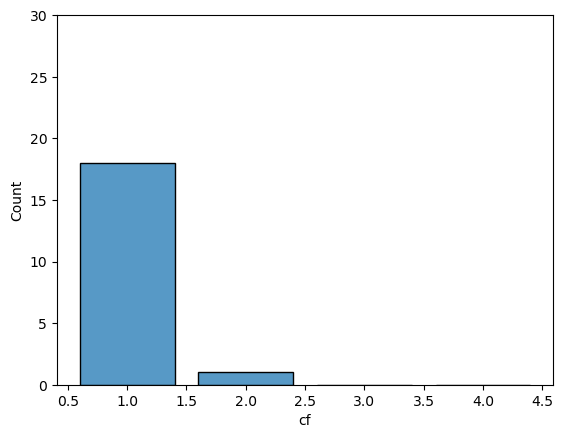

In [10]:
import seaborn as sns

for cf,state in zip([nem, v, n, q, s],["NEM","VIC","NSW","QLD","SA"]):

    plt.figure()
    
    series, days = wind_drought(cf)
    print(state,days.shape)
    series = series.squeeze()
    groups = (series != series.shift()).cumsum()
    length = series.groupby(groups * series).size().drop(0)
    #length.hist(bins=[1,2,3,4])
    sns.histplot(data=length,discrete=True,binrange=[1,4],shrink=0.8)
    plt.ylim([0,30])

(0.0, 1.0)

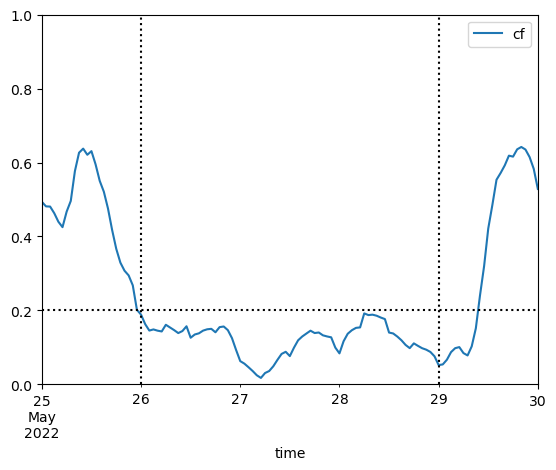

In [13]:
v.loc[slice(
    groups[groups == length.idxmax()].index.min() - dt.timedelta(days=1),
    groups[groups == length.idxmax()].index.max() + dt.timedelta(days=2))
].plot()

plt.gca().axvline(groups[groups == length.idxmax()].index.min(),color="k",ls=":")
plt.gca().axvline(groups[groups == length.idxmax()].index.max() + dt.timedelta(days=1),color="k",ls=":")

plt.gca().axhline(0.2,ls=":",color="k")
plt.ylim([0,1])


In [198]:
from sea_breeze import load_model_data, sea_breeze_funcs, utils
from dask.distributed import Client

client = Client()

2025-08-12 16:25:14,490 - bokeh.server.protocol_handler - ERROR - error handling message
 message: Message 'PATCH-DOC' content: {'events': [{'kind': 'ModelChanged', 'model': {'id': 'p9657'}, 'attr': 'inner_width', 'new': 0}, {'kind': 'ModelChanged', 'model': {'id': 'p9657'}, 'attr': 'inner_height', 'new': 0}, {'kind': 'ModelChanged', 'model': {'id': 'p9657'}, 'attr': 'outer_width', 'new': 0}, {'kind': 'ModelChanged', 'model': {'id': 'p9657'}, 'attr': 'outer_height', 'new': 0}]} 
 error: AssertionError()
Traceback (most recent call last):
  File "/g/data/xp65/public/apps/med_conda/envs/analysis3-24.07/lib/python3.11/site-packages/bokeh/server/protocol_handler.py", line 94, in handle
    work = await handler(message, connection)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/g/data/xp65/public/apps/med_conda/envs/analysis3-24.07/lib/python3.11/site-packages/bokeh/server/session.py", line 295, in patch
    return connection.session._handle_patch(message, connection)
           ^^^

In [199]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 14,Total memory: 63.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37817,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 14
Started: Just now,Total memory: 63.00 GiB
Comm: tcp://127.0.0.1:45895,Total threads: 2
Dashboard: /proxy/40979/status,Memory: 9.00 GiB
Nanny: tcp://127.0.0.1:43323,


In [207]:
lat_slice, lon_slice = utils.get_seaus_bounds()

In [209]:
t1 = "2020-01-02"
t2 = "2025-01-02 23:00"

ua = load_model_data.load_barra_variable(
    "ua100m",
    t1,
    t2,
    "AUST-04",
    "1hr",
    lat_slice,
    lon_slice,
    chunks={"time":1,"lat":-1,"lon":-1})
va = load_model_data.load_barra_variable(
    "va100m",
    t1,
    t2,
    "AUST-04",
    "1hr",
    lat_slice,
    lon_slice,
    chunks={"time":1,"lat":-1,"lon":-1})  

/g/data/xp65/public/apps/med_conda/envs/analysis3-24.07/lib/python3.11/site-packages/xarray/backends/api.py:365: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  var_chunks = _get_chunk(var, chunks, chunkmanager)
/g/data/xp65/public/apps/med_conda/envs/analysis3-24.07/lib/python3.11/site-packages/xarray/backends/api.py:365: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  var_chunks = _get_chunk(var, chunks, chunkmanager)
/g/data/xp65/public/apps/med_conda/envs/analysis3-24.07/lib/python3.11/site-packages/xarray/backends/api.py:365: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  var_chunks

In [210]:
ws = np.sqrt(ua**2 + va**2)

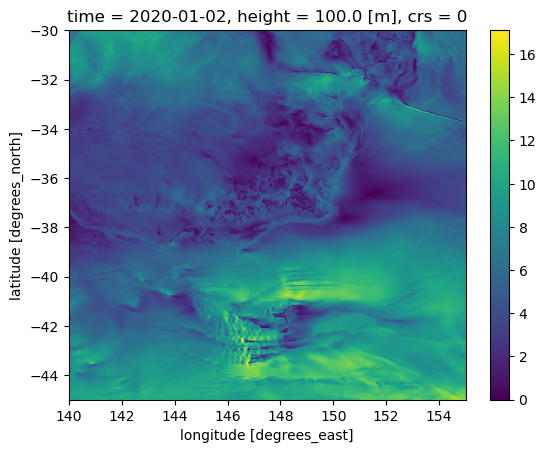

In [211]:
ws.isel(time=0).plot()

In [219]:
ws_low_wind_v = ws.sel(time=np.in1d(ws.time.dt.date,low_wind_days["V"].date))
hour_comp_low_wind_v = ws_low_wind_v.groupby(ws_low_wind_v.time.dt.hour).mean().persist()

In [232]:
ws_high_wind_v = ws.sel(time=np.in1d(ws.time.dt.date,high_wind_days["V"].date))
hour_comp_high_wind_v = ws_high_wind_v.groupby(ws_high_wind_v.time.dt.hour).mean().persist()

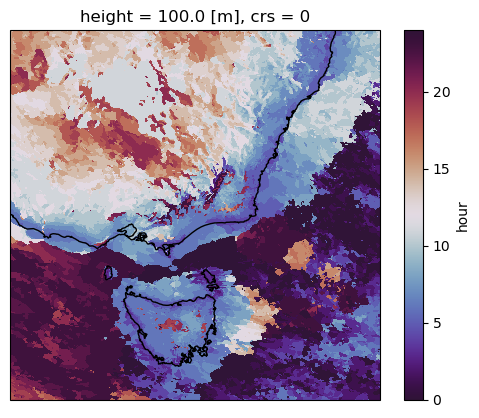

In [234]:
ax=plt.axes(projection=ccrs.PlateCarree())
hour_comp_low_wind_v.idxmax("hour").plot(cmap="twilight_shifted",vmin=0,vmax=24)
ax.coastlines()

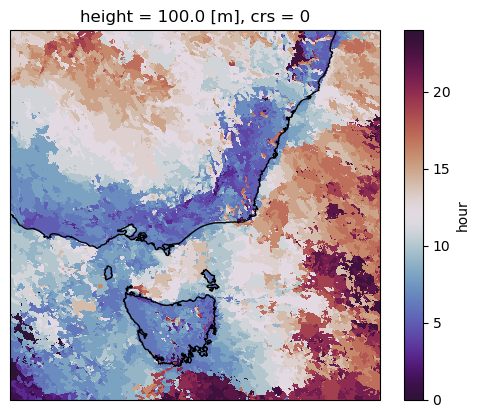

In [235]:
ax=plt.axes(projection=ccrs.PlateCarree())
hour_comp_high_wind_v.idxmax("hour").plot(cmap="twilight_shifted",vmin=0,vmax=24)
ax.coastlines()

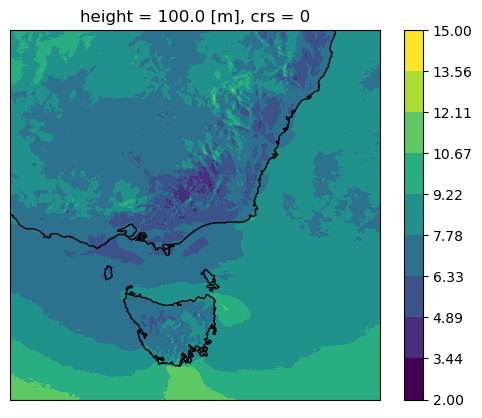

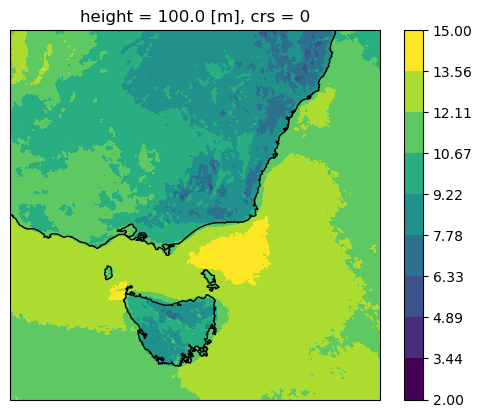

In [244]:
ax=plt.axes(projection=ccrs.PlateCarree())
hour_comp_low_wind_v.max("hour").plot(levels=np.linspace(2,15,10))
ax.coastlines()

plt.figure()
ax=plt.axes(projection=ccrs.PlateCarree())
hour_comp_high_wind_v.max("hour").plot(levels=np.linspace(2,15,10))
ax.coastlines()

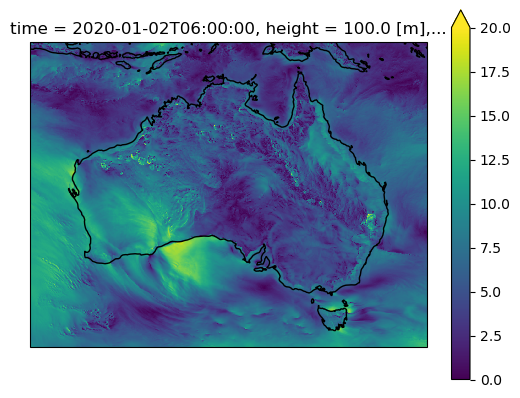

In [74]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax=plt.axes(projection=ccrs.PlateCarree())
ws.sel(time="2020-01-02 12:00").plot(ax=ax,vmin=0,vmax=20)
ax.coastlines()

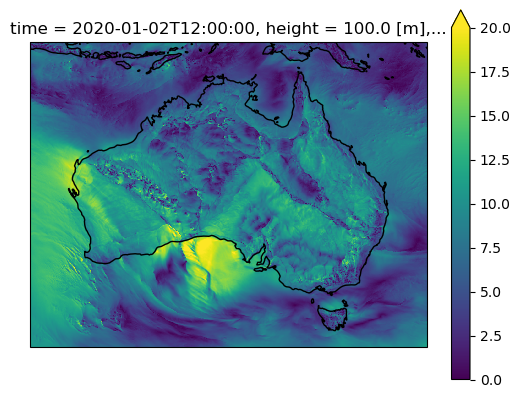

In [75]:
ax=plt.axes(projection=ccrs.PlateCarree())
ws.sel(time="2020-01-02 12:00").plot(ax=ax,vmin=0,vmax=20)
ax.coastlines()